## Quantum Random Number Generator 

### Import packages

In [1]:
from qiskit import *

In [2]:
import math
import numpy as np

from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

%matplotlib inline

### Circuit to be implemented for random generation of numbers 

In [3]:
n=4
cr = ClassicalRegister(n, 'cr')
qr = QuantumRegister(n, 'qr')
qc = QuantumCircuit(qr,cr)

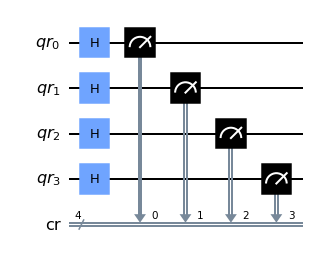

In [4]:
for iz in range(n):
    qc.h(iz)
    
qc.measure(qr, cr)
qc.draw('mpl')

In [5]:
job = execute(qc, backend=Aer.get_backend('statevector_simulator'), shots=1024)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'1100': 1}


In [6]:
int(list(counts.keys())[0], 2)

12

### Function for quantum random number generator 

In [7]:
def quantum_random_num_generator(min_val, max_val):
    
    # Calculating number of qubits
    m1 = math.ceil(math.log(max_val, 2))
    m2 = math.ceil(math.log(min_val, 2))
    n  = max(m1,m2)
    
    # circuit
    cr = ClassicalRegister(n, 'cr')
    qr = QuantumRegister(n, 'qr')
    qc = QuantumCircuit(qr,cr)
    for iz in range(n):
        qc.h(iz)

    qc.measure(qr, cr)
    job = execute(qc, backend=Aer.get_backend('statevector_simulator'), shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    num = int(list(counts.keys())[0], 2)
    
    # checking if number lies in range 
    if (num < min_val) or (num > max_val):
        num_again = quantum_random_num_generator(min_val, max_val)
    
    return num if num<=max_val and num>=min_val else num_again

### Example

In [8]:
# Range of random number
min_val = int(input("Enter the minimum value"))
max_val = int(input("Enter the maximum value"))

Enter the minimum value45
Enter the maximum value70


In [9]:
quantum_random_num_generator(min_val, max_val)

64

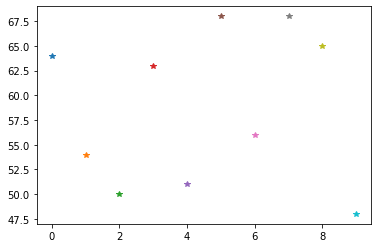

In [10]:
num = []
for iz in range(10):
    plt.plot(iz, quantum_random_num_generator(min_val, max_val), '*')
    num.append(quantum_random_num_generator(min_val, max_val))
    

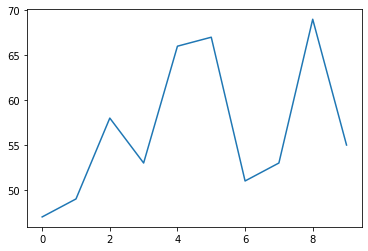

In [11]:
plt.plot(num)